In [2]:
import os
from turtle import st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder name in which the data is stored
directory = "Master Data"

### Data Visualizer

Make sure that this file is in the same directory as the FOLDER that contains the data files. 

    UNIXtime[ms]   fx[N]   fy[N]   fz[N]   mx[Nm]   my[Nm]   mz[Nm]
0  1720601688856   -6.35   15.40    0.30   -0.146   -0.025  -0.0328
1  1720601688887   -6.35   15.45    0.30   -0.124   -0.026  -0.0312
2  1720601688919   -6.35   15.30    0.20   -0.121   -0.026  -0.0320
3  1720601688950   -6.30   15.40    0.35   -0.150   -0.025  -0.0344
4  1720601688981   -6.45   15.40    0.20   -0.116   -0.025  -0.0320


Text(0.5, 1.0, 'jig Measurements, my[Nm] only')

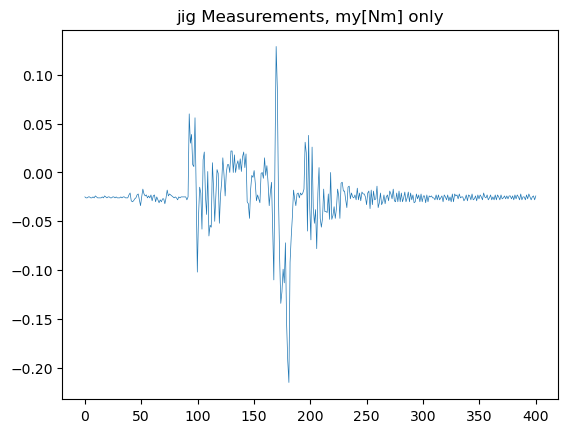

In [30]:

# Define which sensor measurement to read from, valid entries here are "jig", "larm" and "rarm"
sensor_type = "jig"

# Define x, the number of graphs to display, the first x graphs in the directory will be drawn
num_graphs = 1;

# Define which type of data for each sensor to read from
# 1 = fx[N], 2 = fy[N], 3 = fz[N], 4 = mx[Nm], 5 = my[Nm], 6 = [myNm]
data_type = 5

# Define the start and end index of the data to plot, set both to -1 to use the entire range of data
startIdx = 0
endIdx = 400

data_types = ["", " fx[N]", " fy[N]", " fz[N]", " mx[Nm]", " my[Nm]", " mz[Nm]"]
files = os.listdir(directory)

cntr = 0;
for file_name in files:
    if cntr == num_graphs:
        break
    if sensor_type in file_name:
        df = pd.read_csv(os.path.join(directory, file_name))
        print(df.head())
        y = df[data_types[data_type]].values
        x = np.linspace(0, len(y), len(y))
        if (startIdx != -1) or (endIdx != -1):
            y = y[startIdx:endIdx]
            x = np.linspace(startIdx, endIdx, len(y))
        plt.plot(x, y, label=cntr, linewidth=0.5)
        cntr += 1;

plt.title(f'{sensor_type} Measurements,{data_types[data_type]} only')

### Visualize every parameter

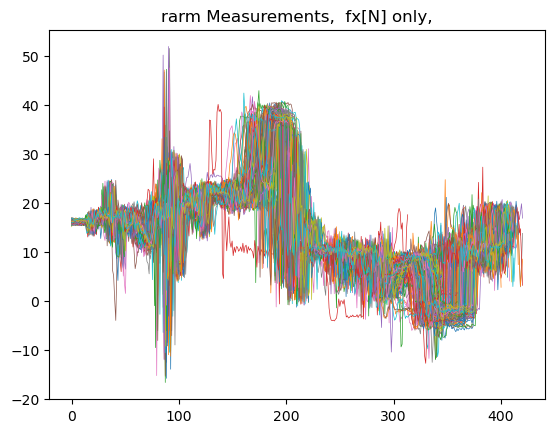

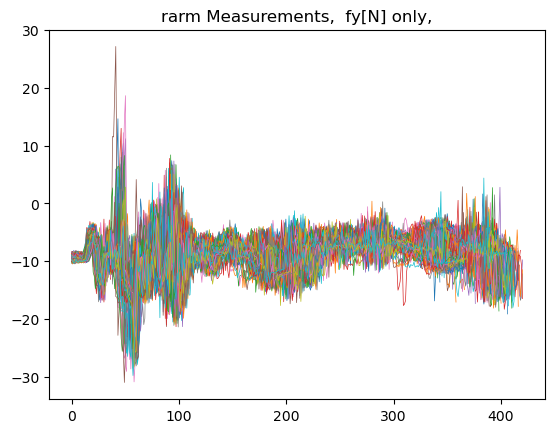

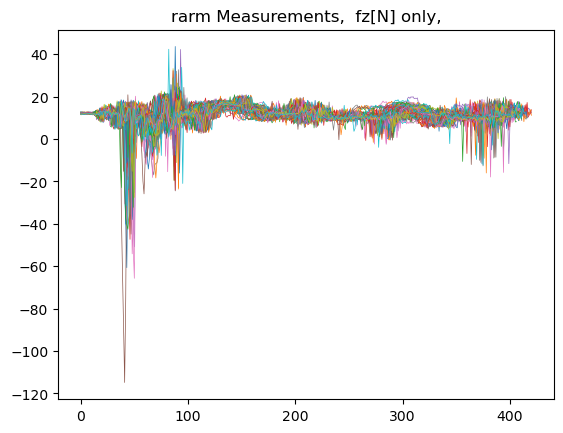

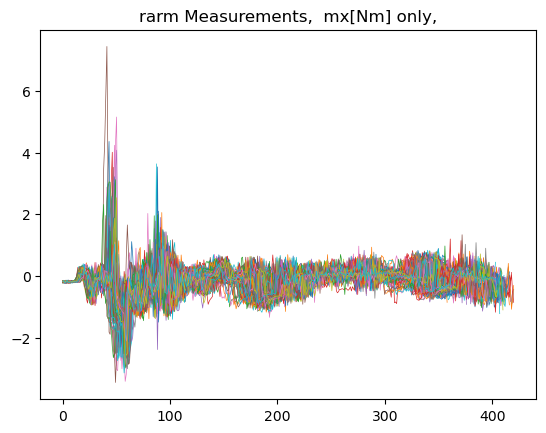

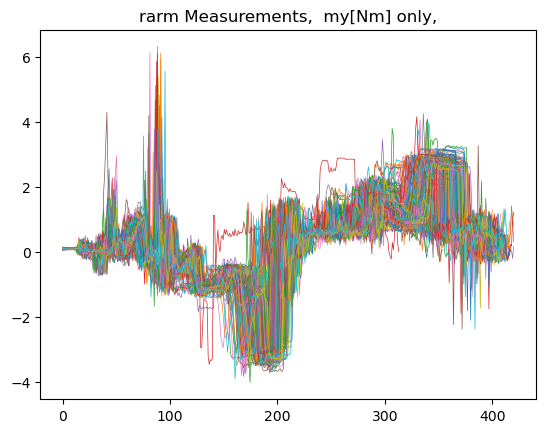

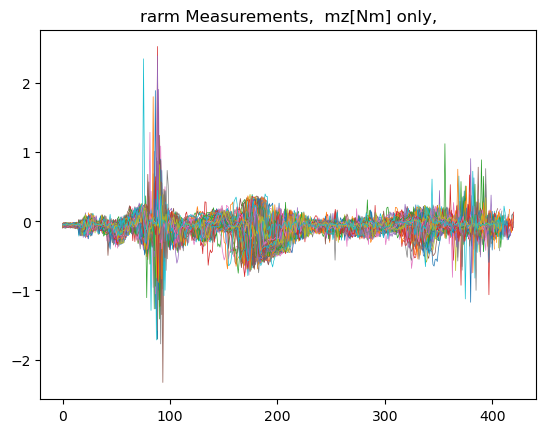

In [4]:


# Define the folder name in which the data is stored
from isort import file


directory = "Master Data"

# Define which sensor measurement to read from, valid entries here are "jig", "larm" and "rarm"
sensor_type = "rarm"

# Define x, the number of graphs to display, the first x graphs in the directory will be drawn
num_graphs = 100; #max number of files in the directory is 232


# Define the start and end index of the data to plot, set both to -1 to use the entire range of data
startIdx = 0
endIdx = 400 # on average, the data is 400 samples long

data_types = ["", " fx[N]", " fy[N]", " fz[N]", " mx[Nm]", " my[Nm]", " mz[Nm]"]
files = os.listdir(directory)


for param in range(1, 7): #iterate through all the parameters
    plt.figure(param) #create a new figure for each parameter
    cntr = 0;
    fileskipped = 0;
    for file_name in files:
        # if cntr == num_graphs:
        #     break
        if sensor_type in file_name:
            df = pd.read_csv(os.path.join(directory, file_name))
            y = df[data_types[param]].values
            if len(y) > 420: #remove the data that is too long to
                fileskipped += 1
                continue 
            x = np.linspace(0, len(y), len(y)) #create a index array for the x-axis, increasing by 1
            # if (startIdx != -1) or (endIdx != -1): # only plot the data between those indices
            #     y = y[startIdx:endIdx]
            #     x = np.linspace(startIdx, endIdx, len(y))
            plt.plot(x, y, label=cntr, linewidth=0.5)
            cntr += 1;
    # print(fileskipped)
    plt.title(f'{sensor_type} Measurements, {data_types[param]} only,')

### Rate

In [24]:
files = os.listdir(directory)

#count number of back sucess and failure and front fold as well
back_success = 0
back_incomplete = 0
back_missed = 0
front_success = 0
front_incomplete = 0
front_missed = 0

for file_name in files:
    if 'jig' in file_name:
        back_res = file_name[-7:-6] #result of rihgt side
        front_res = file_name[-5:-4] #result of left side
        if back_res == 'P':
            back_success += 1
        elif back_res == 'I':
            back_incomplete += 1
        elif back_res == 'M':
            back_missed += 1
        if front_res == 'P':
            front_success += 1
        elif front_res == 'I':
            front_incomplete += 1
        elif front_res == 'M':
            front_missed += 1
        
print(f'Back Success: {back_success}, Back Incomplete: {back_incomplete}, Back Missed: {back_missed}')
print(f'Front Success: {front_success}, Front Incomplete: {front_incomplete}, Front Missed: {front_missed}')

Back Success: 136, Back Incomplete: 38, Back Missed: 57
Front Success: 98, Front Incomplete: 37, Front Missed: 96
